# Synchronous States in Homogeneous Populations of LIF Neurons
### NX-465 Mini-project MP2
### Spring semester 2023

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Simulation parameters
tau_m = 10 #ms
v0 = -50.0  #mV
eta = 0 #mV
v_rest = 15 #mV
R = 50 #membrane resistance 50 Ohm
Beta = 1e2 #ms-1
Beta

100.0

## Exercise 0: Getting Started: non-interacting population

1. Consider N = 100 non-interacting neurons, with initial voltages vi(t = 0) uniformly distributed at random between v0 and η (i.e. vi(0) ∼ U([v0, η])), and submitted to an oscillating external input Iext(t) = I0(1 + sin(ωt)), with I0 = 0.5 mA, ω = 102s−1(= 0.1 ms−1).

    - Compute the membrane potentials vi(t) and firing times of the neurons, for t ≤ Tf = 100 ms.
    
    - Plot the voltage v1(t) of the first neuron, along with the external input RIext(t).

In [119]:
N = 100

I0 = 0.5e-3
omega = 100 #s-1
i_ext = lambda t: I0*(1 + np.sin(omega*t))
Tf = 100 #ms
dt = 1e-2 #ms

voltage = np.zeros((N, int(Tf / dt)))
firing_times = np.zeros((N, int(Tf / dt)))

# Initialize membrane potentials randomly
voltage[:, 0] = np.random.uniform(v0, eta, size=N)
raster = []

for t in range(1, int(Tf/dt)):
    
    #dv/dt follows the LIF model, dv/dt = delta_voltage
    delta_voltage = (-1/tau_m) * (voltage[:, t - 1] - v_rest) + R*i_ext(t)
    
    voltage[:, t] = voltage[:, t - 1] + dt * delta_voltage
    
    firing_neurons = np.where(voltage[:, t] >= eta)[0]
    raster.append(list(np.where(voltage[:, t] >= eta)[0]))
    for neuron in firing_neurons:
        if np.random.rand() < Beta: #question comment implémenter le Beta pck là il fire à tout les coups
            firing_times[neuron][t] = 1
            voltage[neuron, t] = v0 #reset after spike fire to v0 (maybe vrest?)

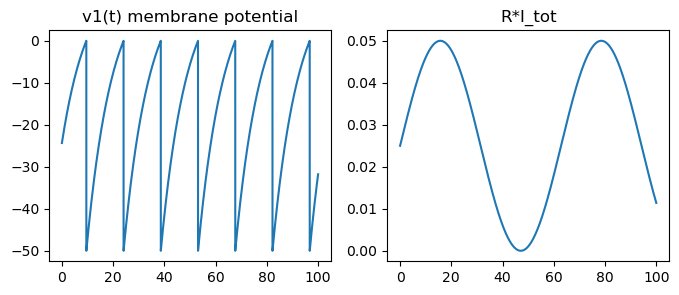

In [120]:
t_space = np.linspace(0, Tf, num = int(Tf/dt))
fig, ax = plt.subplots(1, 2, figsize = (8, 3))
ax[0].plot(t_space, voltage[0,:])
ax[0].set_title("v1(t) membrane potential")
ax[1].plot(t_space, R*i_ext(t_space*1e-3))
ax[1].set_title("R*I_tot")
plt.show()

2. Plot the low-pass filtered activity of the population, using a time bin of τA = 1ms. Make the corresponding raster plot.

How would the system behave as t → ∞? Why?

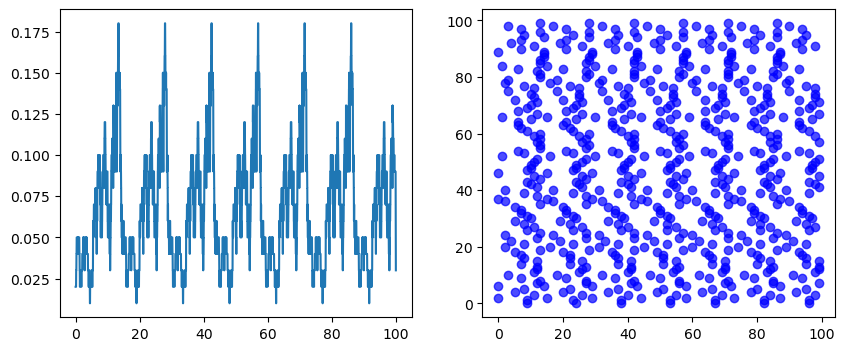

In [147]:
activity = [(1/dt) * sum(firing_times[:, k])/N for k in range(int(Tf/dt))]

ta = 100
filtered_activity = np.convolve(activity, np.ones(ta), mode='same')/ta

#for the raster plot
raster_ta = []
x_coords = []
for idx in range(100):
    neuron_idxs_firing = sum(raster[idx*ta: idx*ta + ta], [])
    raster_ta.append(neuron_idxs_firing)
    
    for n in neuron_idxs_firing:
        x_coords.append(idx)

fig, ax = plt.subplots(1,2, figsize = (10, 4))
ax[0].plot(t_space, filtered_activity)
ax[1].scatter(x_coords, [item for sublist in raster_ta for item in sublist], c = "b", alpha = 0.7)
plt.show()